# Problem Set 7 : Facial Recognition, due May 5 at 11:59pm

<span style="color:red">Warning!</span> Some of the problems in this problem set require heavy computation - you are encouraged to start early so that you don't get stuck at the last minute.

# Face Recognition

Your goal for this problem set is to design a basic face recognition system. Since the machine learning force is now strong with you, the prompts for this problem set are deliberately vague. Be creative - but be careful!

One suggestion - Start by implementing this entire problem set on a relatively small subset of all of the images first, before using the full dataset.

## 1. Data Exploration

Download the "[Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)" data set from [this link](http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz) (roughly 250MB).

### 1.1. Filter out people with few images

First, display a histogram that shows the number of images per individual (you may use log-scale if you like). Which individual has the most images from your dataset? 

Now, remove all individuals for whom you have fewer than 10 images. How many individuals are you left with in the dataset?

In [1]:
#your code here
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import numpy as np
import seaborn as sns
import pandas as pd
import random as rd
from scipy.spatial.distance import cdist 

In [3]:
file_path = 'C:\\Users\\12062\\Downloads\\lfw_funneled'

In [4]:
#initialize
folders_names = []
dic = {}
length = []
images = []
all_names = []
full_path = []
full_path_more_face = []

#loop through each folder
for folders in os.listdir(file_path):
    #print(folders)
    
    #folder's path
    full_path_subfolder = str(file_path)+ '\\' + folders
    #print(full_path_subfolder)
    
    #list all images in each folder
    image = os.listdir(full_path_subfolder)
    #print(image)
    
    for img in image:
        full_name = str(full_path_subfolder)+ '\\' + img
        full_path.append(full_name)
    
    #append how many images in each folder with the person's name
    length.append(len(image))
    all_names.append(folders)
    
    #only getting the person with more than 10 pics 
    if len(image) > 10:
        folders_names.append(folders)
        images.append(image)
        
        dic[str(folders_names)] = image
        
        for j in image:
            full_name_2 = str(full_path_subfolder)+ '\\' + j
            full_path_more_face.append(full_name_2)

    
    #image = np.array(Image.open(os.path.join(file_path, filename)))
    
#to array
images_arr = np.array(images)

#print('Total Number of Faces: {}'.format(len(images)))
print('Total Number of persons: {}'.format(len(folders_names)))
print(images_arr.shape)

#print(folders_names)
print('------------')
#print(length)

Total Number of persons: 143
(143,)
------------


<ipython-input-4-c82d4e0b0d68>:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images_arr = np.array(images)


In [5]:
len(full_path_more_face)

4174

In [6]:
len(full_path)

13233

In [7]:
df_plot = pd.DataFrame(list(zip(all_names, length)),
               columns =['Name', 'Count'])

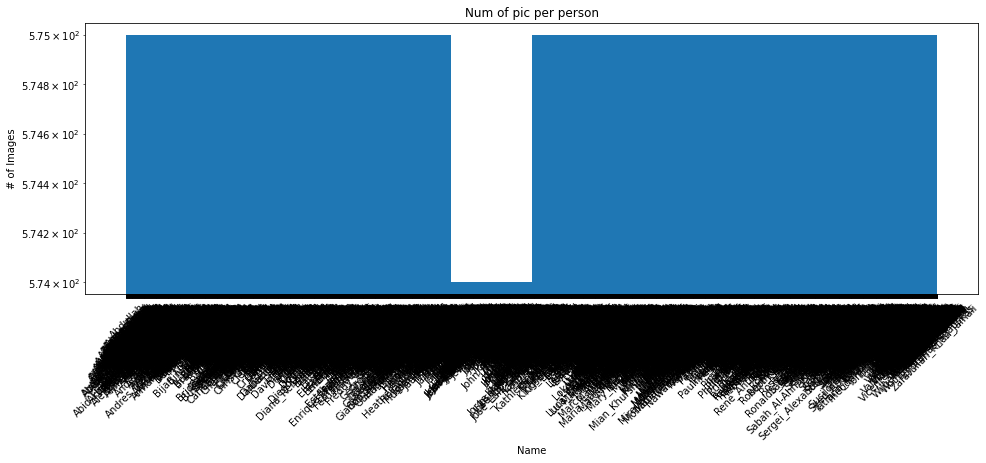

In [8]:
plt.figure(figsize= (16,5))
plt.hist(df_plot['Name'],log=True)

plt.xlabel('Name')
plt.ylabel('# of Images')
plt.title('Num of pic per person')
plt.xticks(rotation=45);

In [59]:
maxValues = df_plot.max()
print(maxValues)

Name     Zydrunas_Ilgauskas
Count                   530
dtype: object


Zydrunas_Ilgauskas has the most count of image! 

### 1.2. Show some faces!

1. Pick 10 random images from the dataset and display them in a 2 x 5 grid.
2. Create a single image that shows the "average face" -- i.e. each pixel should display the average value of that particular pixel across all of the images. (Remember you have filtered out some images from 1.1, so don't include them!)
3. For each pixel, calculate the standard deviation of values for that pixel across all the images (you will have a different standard deviation for each of the three color channels, feel free to just show the standard deviation of one of the channels, or to average the standard deviation of the three channels at each pixel). Plot these standard deviations as a heatmap.

What do you notice about the distribution of mean and standard deviation values in these images? (e.g. are they evenly distributed?)

In [9]:
#store the random faces selection
random_file = []

#loop each folder/person
for i in range (len(folders_names)):
    #print(i)
    
    #loop all the images in each folder 
    for n in images[i]:
        #print(n)
        
        #get the full path of the image
        path =  file_path + '\\' + str(folders_names[i]) + '\\' + str(n)
        #print(path)   
        
        #append the image path
        random_file.append(path)

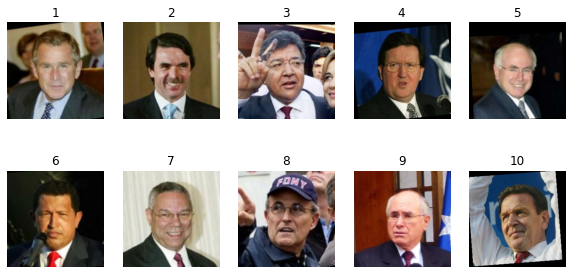

In [10]:
#set the figure size
#plt.figure(figsize=(10, 10))

num_images = 10
fig = plt.figure(figsize=(10, 5))
rows = 2
columns = 5
imlist = []

#select n number of random choose images
for i in range(num_images):
    #plot image
    #plt.subplot(1, num_images, i+1)
    
    #randomly choose index number in the list
    index = np.random.choice(range(len(random_file)))
    
    #choose image based on the index
    image_path = random_file[index]
    imlist.append(image_path)
    
    #read images 
    image = mpimg.imread(image_path)
    
    
    fig.add_subplot(rows, columns, i+1)
    
    plt.axis('off')
    plt.title(i+1)
    
    #print(index)
    #print(image_path)
    
    
    plt.imshow(image)
    
plt.show()

In [11]:
'''# Access all PNG files in directory
allfiles=os.listdir(os.getcwd())
imlist=[filename for filename in allfiles if  filename[-4:] in [".png",".PNG"]]

'''
'''

for filename in allfiles：
    if  filename[-4:] in [".jpg",".JPG"]：
      imlist.append(filename)
    

'''


# Assuming all images are the same size, get dimensions of first image
w,h = Image.open(imlist[0]).size
N = len(imlist)

# Create a numpy array of floats to store the average (assume RGB images)
arr = np.zeros((h,w,3),np.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr = np.array(Image.open(im),dtype = np.float)
    #print(imarr)
    #print('-----')
    arr = arr + imarr/N
    #print(arr)
    
# Round values in array and cast as 8-bit integer
arr = np.array(np.round(arr),dtype = np.uint8)
#print(arr)

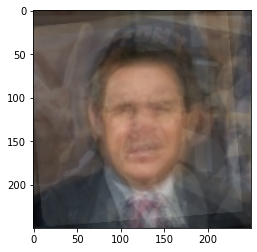

In [12]:
# Generate, save and preview final image
out = Image.fromarray(arr,mode="RGB")
plt.imshow(out)

*Enter your observations here*

## 2. k-Means Clustering


### 2.1. Implementation

Implement the k-Means clustering algorithm that we discussed in class, using the Euclidean distance function. This will require that you define three new functions:
1. InitializeCentroids(X, k)
2. FindClosestCentroids(X, centroids)
3. ComputeCentroidMeans(X, centroids, k)

*Hint:* You may find  the [`pairwise_distances_argmin`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html) function useful.

In [14]:
def InitializeCentroids(X, k):
    
    idx = np.random.choice(len(X), k, replace = False)
    Centroids = X[idx, :]
    
    return Centroids

In [15]:
def FindClosestCentroids(X, centroids):
    #for each datapoint compute the euclidian distance from all the centroids 
    d_l = []
    distances = cdist(X, centroids, 'euclidean')
            
    #Centroid with the minimum Distance from each data points
    for i in distances:
        d_l.append(np.argmin(i))
        d_arr = np.array(d_l)        
            
    return d_arr

In [16]:
def ComputeCentroidMeans(X, centroids, k, clusters):
    #assign all data points to one of the cluster
    #calculate the mean of all the individual clusters and
    #move the centroid to calculated mean

    for i in range(k):
        centroids[i] = np.mean(X[clusters == i], axis =0)

### 2.2. Sanity check

Apply your k-Means algorithm to a toy dataset to make sure it works properly. Also create a scatterplot that shows these datapoints, colored by cluster. 

In [17]:
#dataset
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)

data.columns = boston.feature_names[:]
data['MEDV'] = boston['target']

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
#input data X
X = data.iloc[:, [5, 12]].values
X

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

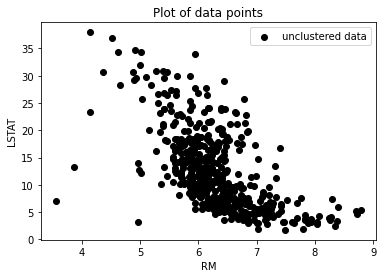

In [19]:
#unclustered data
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('RM')
plt.ylabel('LSTAT')
plt.legend()
plt.title('Plot of data points')
plt.show()

In [20]:
from copy import deepcopy
# Number of clusters
K = 3
# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole dat
centers = InitializeCentroids(X, 3)
print(centers)
print('-----')

centers_old = np.zeros(centers.shape) # to store old centers
print(centers_old)
print('-----')

centers_new = deepcopy(centers) # Store new centers
print(centers_new)
print('-----')

clusters = np.zeros(n)
print(clusters)
print('-----')

distances = np.zeros((n,K))
print(distances)
print('-----')

#converge condition
error = np.linalg.norm(centers_new - centers_old)
print(error)
print('-----')


while error > 0.005:
    
    clusters = FindClosestCentroids(X, centers_new)
    centers_old = deepcopy(centers_new)
    print(centers_old)
    
    ComputeCentroidMeans(X, centers_new, K, clusters)
    print(centers_new)
    error = np.linalg.norm(centers_new - centers_old)

[[ 6.115  9.43 ]
 [ 6.431 15.39 ]
 [ 6.279 11.97 ]]
-----
[[0. 0.]
 [0. 0.]
 [0. 0.]]
-----
[[ 6.115  9.43 ]
 [ 6.431 15.39 ]
 [ 6.279 11.97 ]]
-----
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [21]:
print(centers_new)

[[ 6.64934959  6.8953252 ]
 [ 5.64461765 26.20955882]
 [ 6.04401562 15.22890625]]


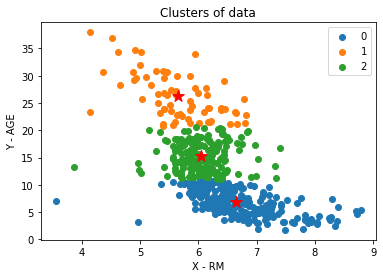

In [22]:
#Visualize the results
u_labels = np.unique(clusters)

for i in u_labels:
    plt.scatter(X[clusters == i , 0] , X[clusters == i , 1] , label = i)
    
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='r', s=150)

plt.title('Clusters of data')
plt.xlabel('X - RM')
plt.ylabel('Y - AGE')
plt.legend()
plt.show()

In [23]:
#sanity check with sklearn k means
from sklearn.cluster import KMeans
kmeans = KMeans(init="random",n_clusters=3,n_init=10, max_iter=50,random_state=42)
kmeans.fit(X)

true_centers = kmeans.cluster_centers_
print(true_centers)

[[ 6.04401563 15.22890625]
 [ 6.64934959  6.8953252 ]
 [ 5.64461765 26.20955882]]


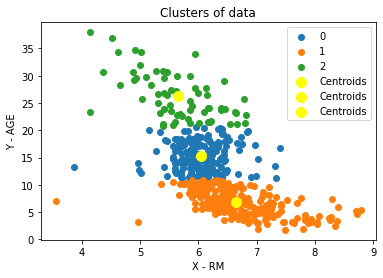

In [24]:
#final distances and points to each cluster
distances = cdist(X, true_centers ,'euclidean')
points = np.array([np.argmin(i) for i in distances])

#Visualize the results
u_labels = np.unique(points)

for i in u_labels:
    plt.scatter(X[points == i , 0] , X[points == i , 1] , label = i)

plt.scatter(true_centers[0,0],true_centers[0,1], s= 100, c='yellow',label='Centroids')    
plt.scatter(true_centers[1,0],true_centers[1,1], s= 100, c='yellow',label='Centroids') 
plt.scatter(true_centers[2,0],true_centers[2,1], s= 100, c='yellow',label='Centroids') 

plt.title('Clusters of data')
plt.xlabel('X - RM')
plt.ylabel('Y - AGE')
plt.legend()
plt.show()

# 2.3. Image centroids
Apply your k-Means algorithm to the images dataset, using k=10. Make sure to normalize your data first! Show a 10 x 2 grid of images where the first column contains (a) the image that represents the centroid for each of those clusters, and the second column contains (b) the closest image in the original dataset to that centroid. Use Euclidean distance. What do you notice?

*Note:* As you may notice, there are 250x250x3 = 187500 features for each image. If your k-Means algorithm is not implemented efficiently -- and even if it is -- it might take a long time for your algorithm to converge. If your computer is slow, it might even take a very long time for you to simply normalize your data. We recommend you convert your RGB images into grayscale first (using, for instance, the [`rgb2grey`](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2grey) function, or any other way to convert to grayscale) before normalizing.



In [25]:
# Build up average pixel intensities, casting each image as an array of floats
pic_list = []

for im in full_path_more_face:
    img = Image.open(im)
    imGray = img.convert('L')
    
    imarr = np.array(imGray, dtype = np.float)
    pic_list.append(imarr)

In [26]:
#pic list to np array
pic_arr = np.array(pic_list)

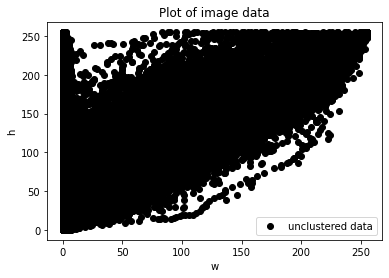

In [27]:
#unclustered data
plt.scatter(pic_arr[:,0],pic_arr[:,1],c='black',label='unclustered data')
plt.xlabel('w')
plt.ylabel('h')
plt.legend()
plt.title('Plot of image data')
plt.show()

<Figure size 432x288 with 0 Axes>

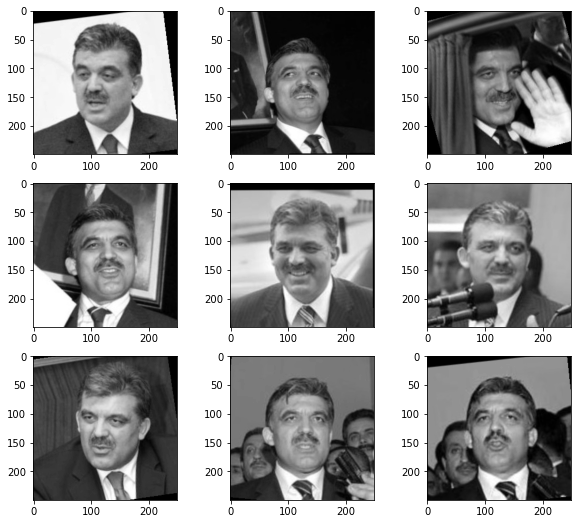

In [28]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(pic_arr[i])

In [29]:
# Checking the minimum and maximum values of x_train
print(pic_arr.min())
print(pic_arr.max())

0.0
255.0


In [30]:
# Data Normalization
# Conversion to float
x_train = pic_arr.astype('float32') 

# Normalization
x_train = x_train/255.0

In [31]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0.0
1.0


In [32]:
# Checking the shape
print(x_train.shape)

(4174, 250, 250)


In [33]:
# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)

In [34]:
# Checking the shape
print(X_train.shape)

(4174, 62500)


In [35]:
# Number of clusters
K = 10
#image data 
data = X_train

# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole dat
centers = InitializeCentroids(data, K)
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers


clusters = np.zeros(n)

distances = np.zeros((n,K))


#converge condition
error = np.linalg.norm(centers_new - centers_old)

while error > 0.005:
    
    clusters = FindClosestCentroids(data, centers_new)
    
    centers_old = deepcopy(centers_new)
    
    ComputeCentroidMeans(data, centers_new, K, clusters)
    error = np.linalg.norm(centers_new - centers_old)

In [36]:
clusters

array([7, 8, 6, ..., 3, 8, 3], dtype=int64)

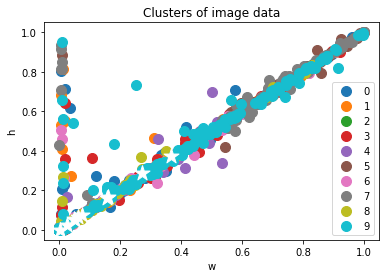

In [37]:
#Visualize the results
u_labels = np.unique(clusters)

for i in u_labels:
    plt.scatter(data[clusters == i , 0] , data[clusters == i , 1] ,s=100, label = i)
    
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='w', s=250)

plt.title('Clusters of image data')
plt.xlabel('w')
plt.ylabel('h')
plt.legend()
plt.show()

In [38]:
#check centroid shape
centers_new.shape

(10, 62500)

In [39]:
#convert it back to 3D
centers = centers_new.reshape(10,250,250)

In [40]:
#de-normalize the pixels 
centers = centers * 255

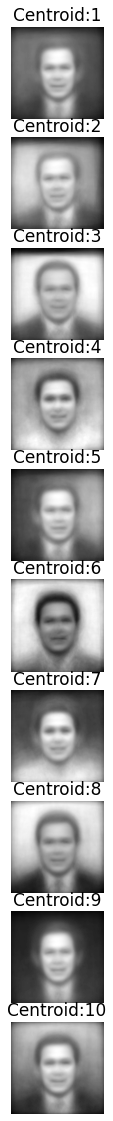

In [41]:
#plot the centroids images 
plt.figure(figsize = (5,20))
bottom = 0.35
for i in range(10):
    plt.subplots_adjust(bottom)
    plt.subplot(10,1,i+1)
    plt.title('Centroid:{}'.format(i+1),fontsize = 17)
    plt.imshow(centers[i])
    plt.axis('off')

*Enter your observations here*

### 2.4 Classify yourself

Take a picture of yourself and scale it so that it is in a similar format to the images in the dataset. Show four images:
 1. The image of yourself.
 2. The cluster centroid closest to that image.
 3. The closest image in the dataset to that cluster centroid.
 4. The closest image in the dataset to the image of yourself.


In [43]:
# Reading the image
image = plt.imread('me.jpg')
plt.imshow(image)
image.shape

FileNotFoundError: [Errno 2] No such file or directory: 'me.jpg'

In [ ]:
# RGB image is converted to Monochrome image
from skimage import color
from skimage import io
image = color.rgb2gray(io.imread('me.jpg'))

In [ ]:
# Reshaping into a row vector
image = image.reshape(1,250*250)

## 3. PCA and Eigenfaces 

Ensure you are using normalized data. Then, set aside 50% of the images as "test" data and using the remaining images as "training" data.


### 3.1. How many components?

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn on the training dataset. Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 100. How many components are required to explain 75% of the variation in your original data?

In [42]:
# Checking the shape
print(X_train.shape)

(4174, 62500)


In [43]:
len(X_train)/2

2087.0

In [44]:
rd.shuffle(X_train)

train_data = X_train[:2087]
test_data = X_train[2087:]

In [45]:
# Checking the shape
train_data.shape

(2087, 62500)

In [46]:
from sklearn.decomposition import PCA

In [47]:
#variance explained by number of components from 1 to 100
comp_n = 100
pca = PCA(n_components = comp_n)
pca.fit(train_data)
vari = pca.explained_variance_ratio_

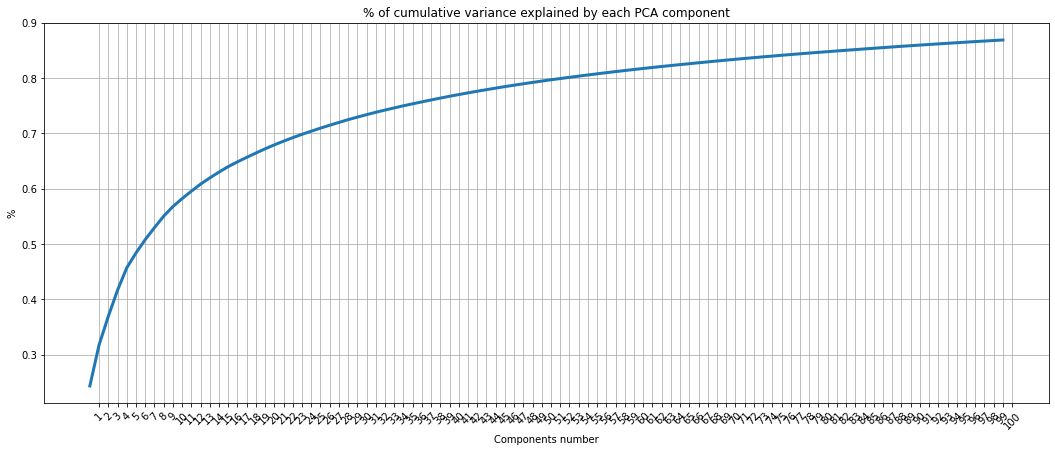

In [48]:
#variance explained by number of components from 1 to 100
comp_n = 100
pca = PCA(n_components = comp_n)
pca.fit(train_data)

plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

plt.xlabel('Components number')
plt.ylabel('%')
plt.title('% of cumulative variance explained by each PCA component')
#ax.yaxis.set_ticks_position('left')
#ax.xaxis.set_ticks_position('bottom')
plt.xticks(range(1, 101), [str(x) for x in range(1, 101)],rotation=45)
plt.grid()

In [49]:
np.where(pca.explained_variance_ratio_.cumsum() >= 0.75)

(array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int64),)

35 components are required to explain 75% of the variation in the original data.

### 3.2. The Eigenfaces

Extract the 10 first principal components (the "eigenfaces") and display them below.

In [50]:
eigenvector = pca.components_
eigenvector

array([[ 1.6766037e-03,  1.7982746e-03,  1.8748681e-03, ...,
         1.0071150e-03,  9.9810935e-04,  9.9630968e-04],
       [ 1.3874997e-03,  1.3277610e-03,  1.3245641e-03, ...,
         6.2545184e-03,  5.8187679e-03,  5.1943441e-03],
       [ 4.3374733e-03,  4.7728643e-03,  5.0156028e-03, ...,
         2.7947871e-03,  2.6257441e-03,  2.7159671e-03],
       ...,
       [-1.9958375e-03, -2.2759582e-03, -7.8645610e-04, ...,
         4.6650874e-03,  4.0823030e-03,  6.3593378e-03],
       [ 3.0660189e-03,  2.5547410e-03,  3.9019687e-03, ...,
         1.9832901e-04,  9.8794713e-05,  1.7896562e-03],
       [ 4.8896624e-03,  5.8228779e-03,  3.6896614e-03, ...,
         5.0637345e-03,  4.5158113e-03,  4.6167034e-03]], dtype=float32)

In [51]:
eigenvalues = pca.explained_variance_
eigenvalues

array([994.1067   , 302.79245  , 210.52975  , 192.6029   , 165.5326   ,
       109.562065 ,  98.53384  ,  88.184525 ,  84.46911  ,  71.45261  ,
        58.26598  ,  54.962376 ,  52.288483 ,  45.92143  ,  42.91455  ,
        40.47974  ,  35.140312 ,  32.993935 ,  32.08079  ,  31.085361 ,
        29.197136 ,  27.317549 ,  25.932909 ,  24.63972  ,  23.007725 ,
        22.511421 ,  21.489084 ,  20.701036 ,  20.34374  ,  18.81012  ,
        18.262259 ,  17.474663 ,  16.348915 ,  15.868645 ,  15.837994 ,
        14.554951 ,  14.268711 ,  13.988403 ,  13.959317 ,  13.273269 ,
        12.713528 ,  12.640405 ,  11.872719 ,  11.653198 ,  11.379075 ,
        11.135557 ,  10.57349  ,  10.317392 ,  10.06755  ,   9.862742 ,
         9.649662 ,   9.10621  ,   8.943237 ,   8.8240385,   8.581345 ,
         8.444119 ,   8.340141 ,   8.023656 ,   7.875424 ,   7.7158775,
         7.6476407,   7.3765454,   7.145484 ,   7.050737 ,   6.8650417,
         6.799354 ,   6.7402563,   6.6289315,   6.5360713,   6.3

In [54]:
X_pca = pca.fit_transform(train_data)

In [55]:
df_orig = pca.inverse_transform(X_pca)
df_orig

array([[ 0.01109345,  0.00982764,  0.05100657, ...,  0.055203  ,
         0.03883566,  0.02343794],
       [ 0.01109352,  0.00982776,  0.05100676, ...,  0.05520257,
         0.0388355 ,  0.0234377 ],
       [ 0.01109321,  0.00982741,  0.05100642, ...,  0.05520241,
         0.03883517,  0.02343731],
       ...,
       [ 0.0183228 ,  0.04164305, -0.00436182, ..., -0.01286145,
         0.03273151,  0.03934629],
       [ 0.04857546,  0.04264908, -0.02966619, ..., -0.00461975,
        -0.02192181, -0.0311814 ],
       [ 0.0474839 ,  0.02937918,  0.03260145, ...,  0.02764221,
         0.02411049,  0.02198143]], dtype=float32)

In [56]:
n_samples = df_orig.shape
n_samples

(2087, 62500)

In [57]:
#convert it back to 3D
df_orig_3d = df_orig.reshape(2087,250,250)
df_orig_3d.shape

(2087, 250, 250)

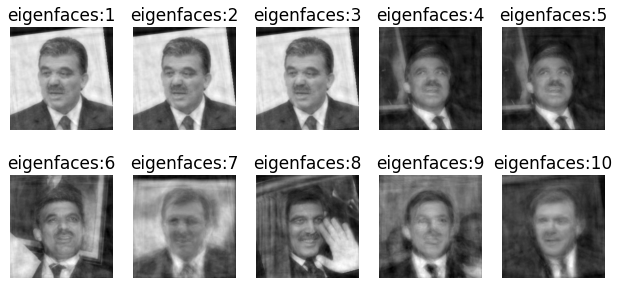

In [58]:
#plot the centroids images 
plt.figure(figsize = (15,5))
bottom = 0.35
for i in range(10):
    plt.subplots_adjust(bottom)
    plt.subplot(2,5,i+1)
    plt.title('eigenfaces:{}'.format(i+1),fontsize = 17)
    plt.imshow(df_orig_3d[i])
    plt.axis('off')

### 3.3. Projections, clustering and PCA
 - Project all of the training and test data into the 40-dimensional space defined by the first 40 principal components.
 - Apply k-means clustering, with k=16, to the 40-dimensional projections of the training data. 
 - Display a 4 x 4 grid of images that shows what each of the 16 centroids look like after the centroid is projected back into the original-image space.

In [ ]:
#your code here

### 3.4. Recognition

Create a set of 10 images using (i) 8 images randomly selected from the test data, (ii)  any other non-face image you can find that has the right dimensions, and (iii) an image of yourself. Create a 10 x 5 grid of images, with one row for each of these images, and 5 columns that contain: 
1. The original image. 
2. The reconstruction of that image after it is projected onto the 40-dimensional eigenface-space and then re-projected back into the original image space. 
3. Find the nearest centroid (from 3.3) to the image, and show the reconstruction of that nearest centroid. 
4. Find the image in the training data whose 40-dimensional representation is closest to that centroid, and show the reconstruction of that image.
5. Show the original training image that was selected in above (step 4 in this list)

In [ ]:
#your code here

### 3.5. Facial recognition bias
Machine learning approaches to facial recognition have been widely criticized for encoding biases. These issues are the subject of several rigorous academic articles ([1](http://proceedings.mlr.press/v81/buolamwini18a/buolamwini18a.pdf), [2](https://dl.acm.org/doi/abs/10.1145/3442188.3445920), [3](https://arxiv.org/abs/1607.06520)), countless media articles (e.g., [1](https://www.nytimes.com/2019/07/08/us/detroit-facial-recognition-cameras.html), [2](https://www.nytimes.com/2019/01/24/technology/amazon-facial-technology-study.html), [3](https://www.usatoday.com/story/tech/2015/07/01/google-apologizes-after-photos-identify-black-people-as-gorillas/29567465/)), and a 2021 [Netflix documentary](https://www.netflix.com/title/81328723). Now that you have a better sense for how these ML-based systems work, briefly summarize the main sourcse of bias that could exist in the system that you just implemented.

- the train image set could have bias training data that holds less racial minority group, which could results in a less accurate eigenface references. 
- how the image was taken, the angle, the lightings, the quality of images could also affect the training process

### 3.6. (Extra credit) Share your results
Post the following to bCourses for people in the class to see:
 - The photo of yourself
 - The cluster centroid from 2.4 that is closest to that image
 - The closest image in the dataset to that cluster centroid
 - The reconstruction of your image after it has been projected and reprojected (i.e., #2 in 3.4)
 - The nearest centroid to the projection (i.e., #3 in 3.4)
 - The closest training image to that centroid (i.e., #5 in 3.4)

### 3.7. (Extra credit) PCA Implementation

Implement PCA yourself, without using sklearn. How does the running time of your algorithm compare to the running time of the sklearn version?

In [ ]:
#your code here

*Enter your observations here*

### 3.8. (Extra credit): k-Means++
In 2.1 you implemented k-Means clustering with random initialization of the centroids. In this part implement the k-Means++ version of the algorithm that uses a "smarter" initialization of the centroids in order to achieve faster convergence. Compare the number of iterations it took k-Means in 2.3 to converge with random initialization to the number of iterations it takes k-Means++. Also compare the sum of squared errors that you obtain for both methods. Use, for both, k=20 clusters. The following link shows the paper that proposed k-Means++.
http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf

In [ ]:
#your code here

*Enter your observations here*